# Непрерывные семантические карты (Multidimensional Scaling)

Ссылки на литературу: <br>
Croft, William, and Keith T. Poole. "Inferring universals from grammatical variation: Multidimensional scaling for typological analysis." Theoretical linguistics 34.1 (2008): 1-37. [PDF](http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.114.2508&rep=rep1&type=pdf) <br>
Документация по multidimensional scaling: <br>
https://scikit-learn.org/stable/modules/generated/sklearn.manifold.MDS.html <br>
Документация по визуализации (pyplot.scatter):
https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.scatter.html

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn import manifold
from sklearn.metrics import euclidean_distances

In [2]:
df = pd.read_table('sharp_typ.txt')
df.head(5)

,КОНТЕКСТ,ЦВЕТ,МАРКЕР,СЛОВО1,СЛОВО2,СЛОВО3,СЛОВО4,СЛОВО5,СЛОВО6,СЛОВО7,...,СЛОВО11,СЛОВО12,СЛОВО13,СЛОВО14,СЛОВО15,СЛОВО16,СЛОВО17,СЛОВО18,СЛОВО19,СЛОВО20
0,острый_носок,yellow,o,1,0,1,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
1,острый_клюв,yellow,o,1,0,1,1,0,0,1,...,0,1,1,0,1,0,1,0,1,0
2,острый_мачта,yellow,o,1,0,1,1,0,0,1,...,0,1,0,0,1,0,1,0,1,0
3,острый_лезвие,green,v,1,1,0,1,1,0,0,...,1,0,0,1,0,1,1,1,0,0
4,острый_коса,green,v,1,1,0,1,1,0,0,...,1,0,0,1,0,1,1,1,0,0


In [3]:
matrix = df.loc[:, 'СЛОВО1':'СЛОВО20']
array = matrix.values
print (array.shape)

(32, 20)


In [5]:
similarities = euclidean_distances(array)
mds = manifold.MDS(n_components=2)
print (mds.fit(similarities).stress_) # функция потерь: показывает, насколько сильно расстояния в новом пространстве отличаются от расстояний в исходном пространстве  

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\manifold\mds.py:396: UserWarning: The MDS API has changed. ``fit`` now constructs an dissimilarity matrix from data. To use a custom dissimilarity matrix, set ``dissimilarity='precomputed'``.
  warnings.warn("The MDS API has changed. ``fit`` now constructs an"


257.98725804


In [6]:
array_mds = mds.fit_transform(array)
print (array_mds)

[[ 1.33121663  0.99024817]
 [-0.05886453  1.66097178]
 [ 0.60972286  1.69274202]
 [-1.21050517 -1.94195333]
 [-1.21050527 -1.94195326]
 [ 2.49660843 -0.86897156]
 [ 2.15198776 -1.33773418]
 [ 2.15180819 -1.33806357]
 [-1.73315845 -1.95769871]
 [-0.84732125  1.10925695]
 [ 1.77391913 -1.49909992]
 [ 0.38177042  1.2095939 ]
 [-1.69413932  0.62385257]
 [-0.84732125  1.10925695]
 [-1.30892823  0.75431963]
 [-0.84732125  1.10925695]
 [-0.84732125  1.10925695]
 [ 2.49658673 -0.86902628]
 [-0.84732125  1.10925695]
 [ 0.07948745  0.64584209]
 [ 0.99747724  0.50974686]
 [-1.30963061  0.75578898]
 [-1.76315902 -1.71799888]
 [-1.21050529 -1.94195325]
 [-1.21050569 -1.94195298]
 [ 0.38177081  1.20959093]
 [-0.84732125  1.10925695]
 [ 0.87889099  1.17743083]
 [ 1.33121696  0.99025073]
 [-1.21050565 -1.941953  ]
 [ 1.15045784  1.54113089]
 [ 0.7914133  -1.11869218]]


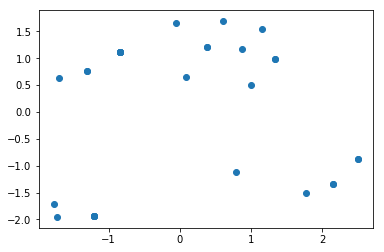

In [7]:
plt.scatter(array_mds[:, 0], array_mds[:, 1])
plt.show()

Изменить размер маркеров: параметр s

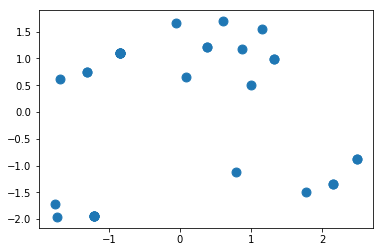

In [8]:
plt.scatter(array_mds[:, 0], array_mds[:, 1], s=80)
plt.show()

Покрасить маркеры в разные цвета: параметр color

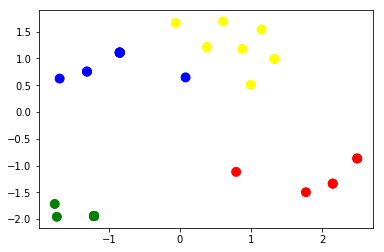

In [9]:
colors = df['ЦВЕТ'].values
plt.scatter(array_mds[:, 0], array_mds[:, 1], color=colors, s=80)
plt.show()

Использовать маркеры разной формы (например, если можно распечатать только черно-белый график, а точки все-таки хочется различить): параметр marker. <br>
Типы маркеров: https://matplotlib.org/3.1.1/api/markers_api.html#module-matplotlib.markers <br>
NB! Параметру marker нельзя подавать на вход массив (как мы это сделали с цветами выше), он принимает только один тип маркера за раз. Поэтому, если мы хотим на одном графике использовать разные типы маркеров, нужно помещать точки на карту либо по группам (сначала все точки с одним маркером, потом с другим, потом с тетьим...), либо по одной. См. вариант по одной:

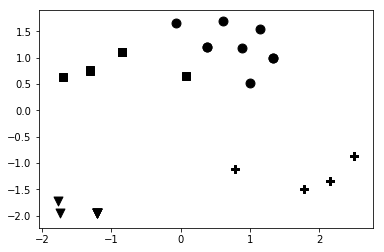

In [10]:
markers = df['МАРКЕР'].values
x = []
y = []
for pair in array_mds:
    x.append(pair[0])
    y.append(pair[1])
for i in range(len(x)):
    plt.scatter(x[i], y[i], c = 'black', marker=markers[i], s=80)
plt.show()

Точки можно подписать:

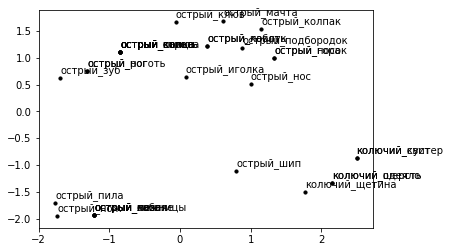

In [22]:
phrases = df['КОНТЕКСТ'].values
for i in range(len(x)):
    plt.scatter(x[i], y[i], c = 'black', s=10)
    plt.annotate(phrases[i], (x[i], y[i]+0.1))
#plt.savefig('./pictures/book_project/picture8_mds.png')
plt.show()

Подписи можно поворачивать (хотя это не всегда помогает; в любом случае, лучше использовать лейблы покороче):

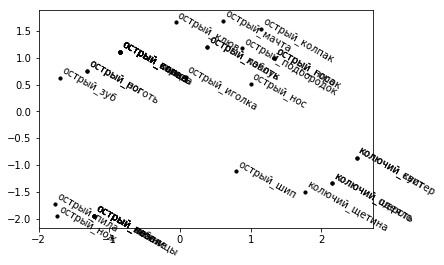

In [23]:
phrases = df['КОНТЕКСТ'].values
for i in range(len(x)):
    plt.scatter(x[i], y[i], c = 'black', s=10)
    plt.annotate(phrases[i], (x[i], y[i]+0.1), rotation=-30)
#plt.savefig('./pictures/book_project/picture8_mds.png')
plt.show()